In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
df = pd.read_csv("../input/titanic/train.csv")
df['Survived_status']=df['Survived'].apply(lambda x: "No" if x==0 else "Yes")
df.head(4)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived_status
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,No
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Yes
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Yes
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Yes


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 891 entries, 0 to 890

Data columns (total 13 columns):

 #   Column           Non-Null Count  Dtype  

---  ------           --------------  -----  

 0   PassengerId      891 non-null    int64  

 1   Survived         891 non-null    int64  

 2   Pclass           891 non-null    int64  

 3   Name             891 non-null    object 

 4   Sex              891 non-null    object 

 5   Age              714 non-null    float64

 6   SibSp            891 non-null    int64  

 7   Parch            891 non-null    int64  

 8   Ticket           891 non-null    object 

 9   Fare             891 non-null    float64

 10  Cabin            204 non-null    object 

 11  Embarked         889 non-null    object 

 12  Survived_status  891 non-null    object 

dtypes: float64(2), int64(5), object(6)

memory usage: 90.6+ KB


In [3]:
print("Survival Status: \n",df['Survived'].value_counts())
print("Passenger Class: ",*df['Pclass'].unique())
print("Embarked City: ",*df['Embarked'].unique())
print("# of parents / children aboard the Titanic: ",*df['Parch'].unique())
print("# of siblings / spouses aboard the Titanic: ",*df['SibSp'].unique())

Survival Status: 

 0    549

1    342

Name: Survived, dtype: int64

Passenger Class:  3 1 2

Embarked City:  S C Q nan

# of parents / children aboard the Titanic:  0 1 2 5 3 4 6

# of siblings / spouses aboard the Titanic:  1 0 3 4 2 5 8


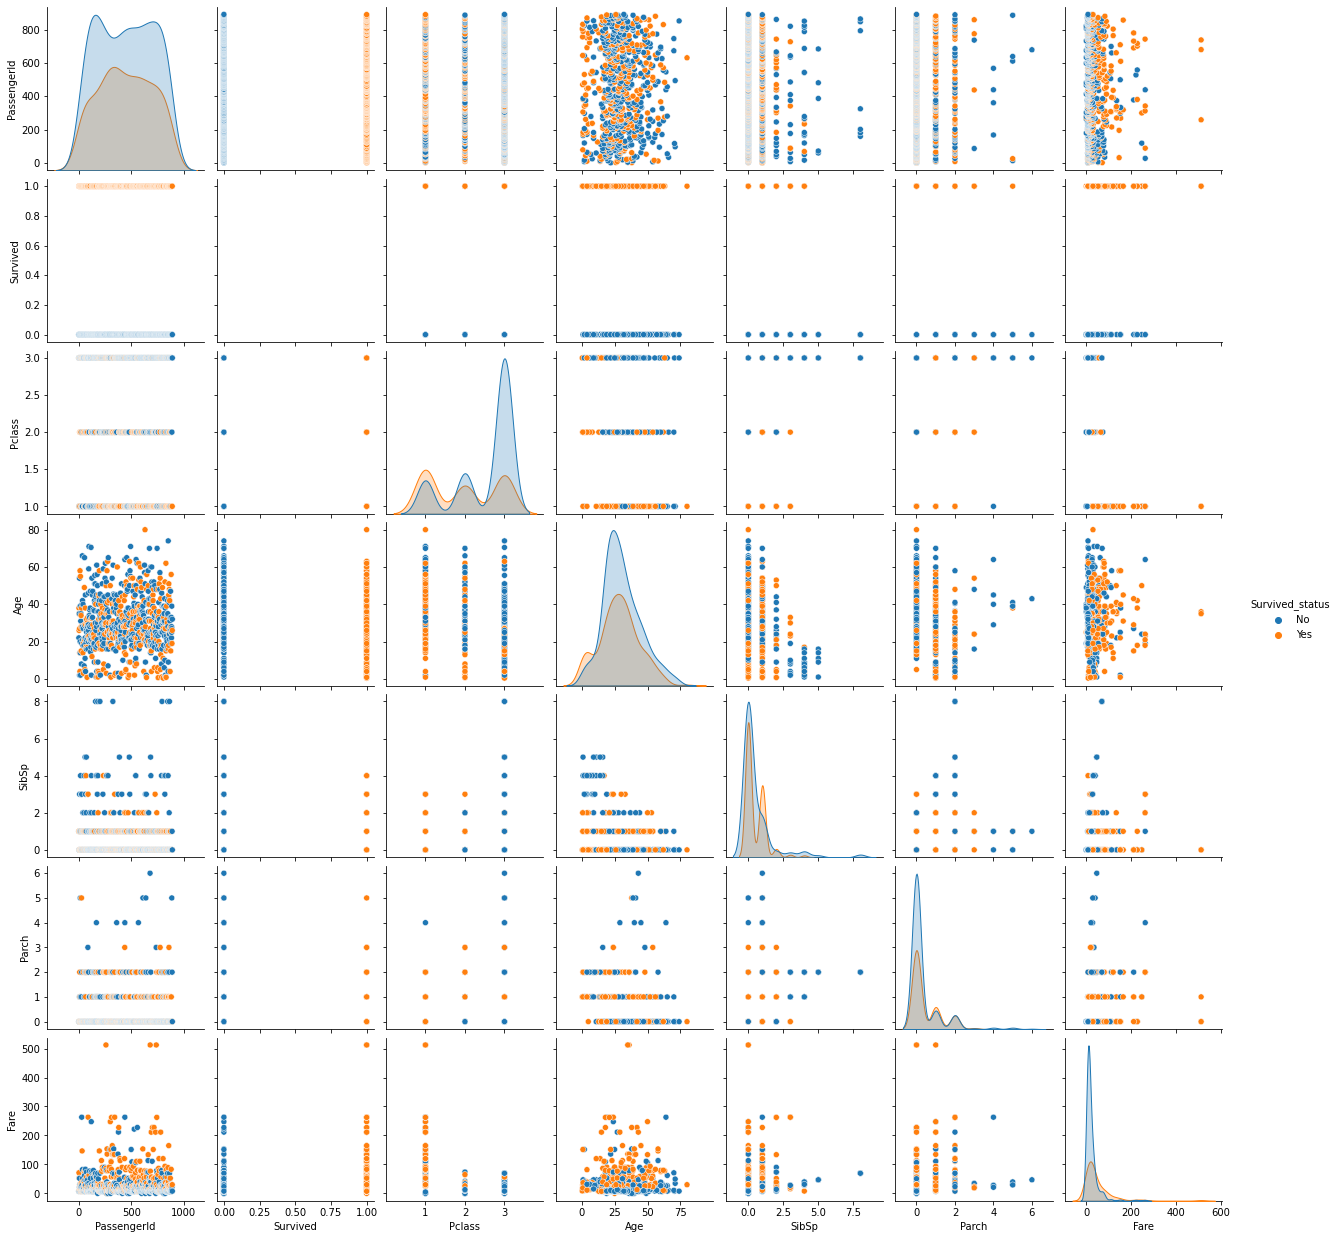

In [4]:
sns.pairplot(df,hue='Survived_status')

Correlation matrix: 

              PassengerId  Survived    Pclass       Age     SibSp     Parch  \

PassengerId     1.000000 -0.005007 -0.035144  0.036847 -0.057527 -0.001652   

Survived       -0.005007  1.000000 -0.338481 -0.077221 -0.035322  0.081629   

Pclass         -0.035144 -0.338481  1.000000 -0.369226  0.083081  0.018443   

Age             0.036847 -0.077221 -0.369226  1.000000 -0.308247 -0.189119   

SibSp          -0.057527 -0.035322  0.083081 -0.308247  1.000000  0.414838   

Parch          -0.001652  0.081629  0.018443 -0.189119  0.414838  1.000000   

Fare            0.012658  0.257307 -0.549500  0.096067  0.159651  0.216225   



                 Fare  

PassengerId  0.012658  

Survived     0.257307  

Pclass      -0.549500  

Age          0.096067  

SibSp        0.159651  

Parch        0.216225  

Fare         1.000000  



Heat Map: 

 AxesSubplot(0.125,0.125;0.62x0.755)


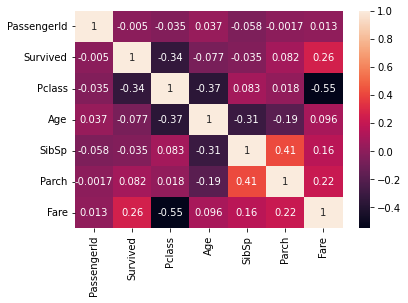

In [5]:
print("Correlation matrix: \n",df.corr())
print("\nHeat Map: \n",sns.heatmap(df.corr(),annot=True))

**Conclusion**

*  Passenger class is mildly negatively correlated with Passenger Fare (-0.55) and Age(-0.37)

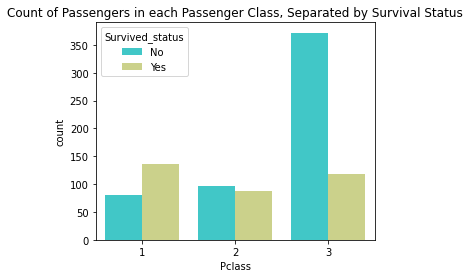

In [7]:
plt.figure(figsize=(5,4))
sns.countplot(x='Pclass',data=df, palette='rainbow',hue='Survived_status').set(title="Count of Passengers in each Passenger Class, Separated by Survival Status")
plt.show()

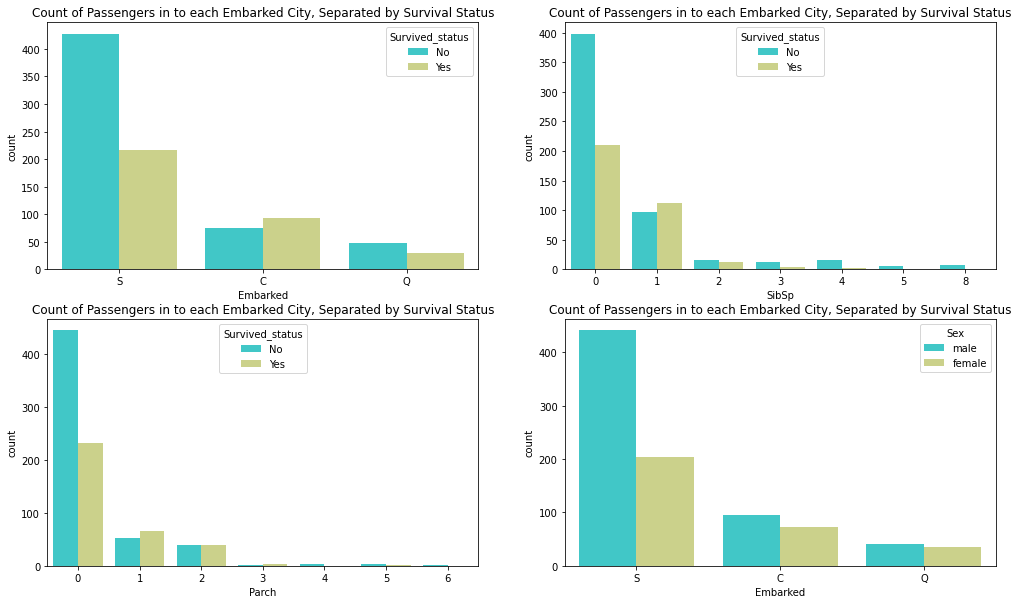

In [8]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(17,10))
sns.countplot(x='Embarked',data=df, palette='rainbow',hue='Survived_status',ax=axes[0][0]).set(title="Count of Passengers in to each Embarked City, Separated by Survival Status")
sns.countplot(x='SibSp',data=df, palette='rainbow',hue='Survived_status',ax=axes[0][1]).set(title="Count of Passengers in to each Embarked City, Separated by Survival Status")
sns.countplot(x='Parch',data=df, palette='rainbow',hue='Survived_status',ax=axes[1][0]).set(title="Count of Passengers in to each Embarked City, Separated by Survival Status")
sns.countplot(x='Embarked',data=df, palette='rainbow',hue='Sex',ax=axes[1][1]).set(title="Count of Passengers in to each Embarked City, Separated by Survival Status")
plt.show()

<AxesSubplot:xlabel='Age', ylabel='Count'>

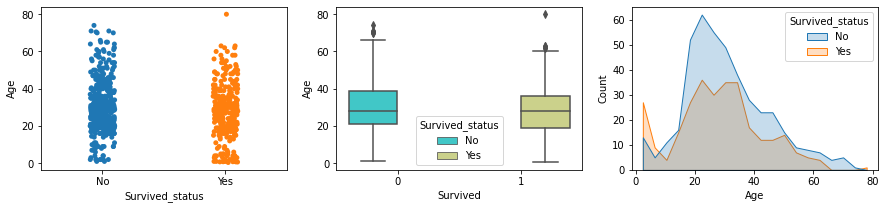

In [9]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15,3))
sns.stripplot(x='Survived_status', y='Age', data=df,ax=axes[0])
sns.boxplot(x='Survived',y='Age',hue='Survived_status',data=df, palette='rainbow',ax=axes[1])
sns.histplot(data=df,x='Age',ax=axes[2],hue='Survived_status',element="poly")

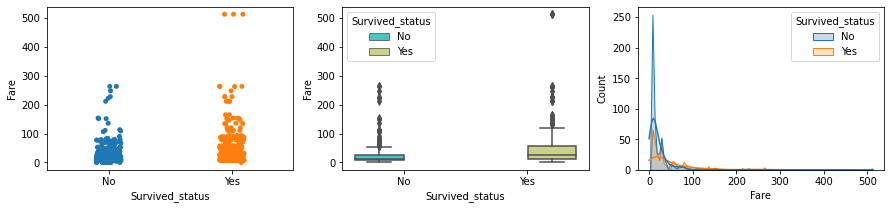

In [10]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15,3))
sns.stripplot(x='Survived_status', y='Fare', data=df,ax=axes[0])
sns.boxplot(x='Survived_status',y='Fare',hue='Survived_status',data=df, palette='rainbow',ax=axes[1])
sns.histplot(data=df,x='Fare',ax=axes[2],hue='Survived_status',bins=100,kde=True,element='poly')
plt.show()

**Conclusion**

When Passenger's Fare is less (less than 20~30), those Passengers had very high probability of **not surviving** as compared to Passengers with higher Fares 

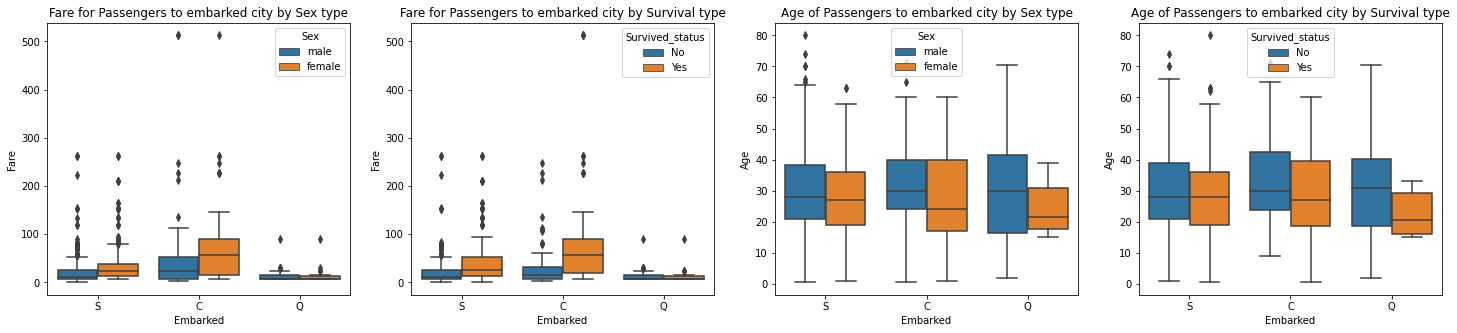

In [12]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(25,5))
sns.boxplot(data=df,x='Embarked',y='Fare',hue='Sex',ax=axes[0]).set(title="Fare for Passengers to embarked city by Sex type")
sns.boxplot(data=df,x='Embarked',y='Fare',hue='Survived_status',ax=axes[1]).set(title="Fare for Passengers to embarked city by Survival type")
sns.boxplot(data=df,x='Embarked',y='Age',hue='Sex',ax=axes[2]).set(title="Age of Passengers to embarked city by Sex type")
sns.boxplot(data=df,x='Embarked',y='Age',hue='Survived_status',ax=axes[3]).set(title="Age of Passengers to embarked city by Survival type")
plt.show()

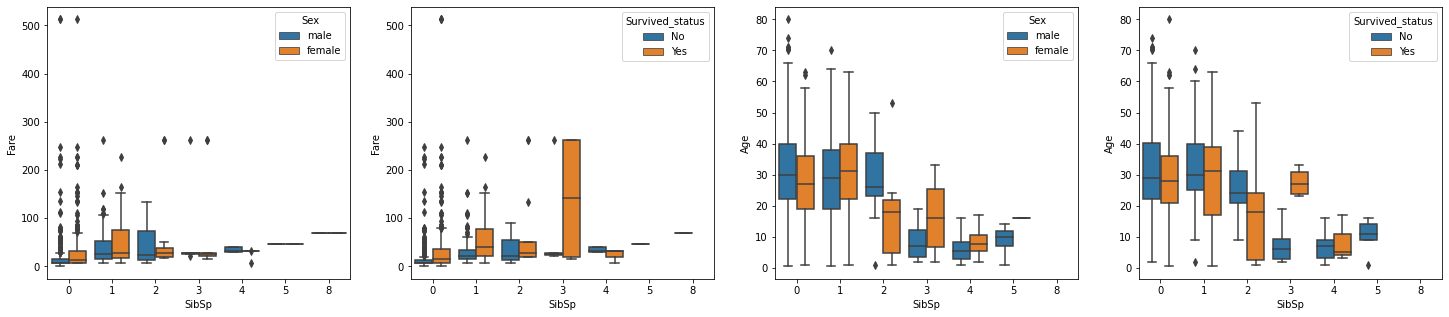

In [13]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(25,5))
sns.boxplot(data=df,x='SibSp',y='Fare',hue='Sex',ax=axes[0])
sns.boxplot(data=df,x='SibSp',y='Fare',hue='Survived_status',ax=axes[1])
sns.boxplot(data=df,x='SibSp',y='Age',hue='Sex',ax=axes[2])
sns.boxplot(data=df,x='SibSp',y='Age',hue='Survived_status',ax=axes[3])
plt.show()

In [15]:
df['Name'][0].split(", ")[1].split(".")[0]

'Mr'

In [16]:
df['initials'] = df['Name'].apply(lambda x: x.split(", ")[1].split(".")[0])

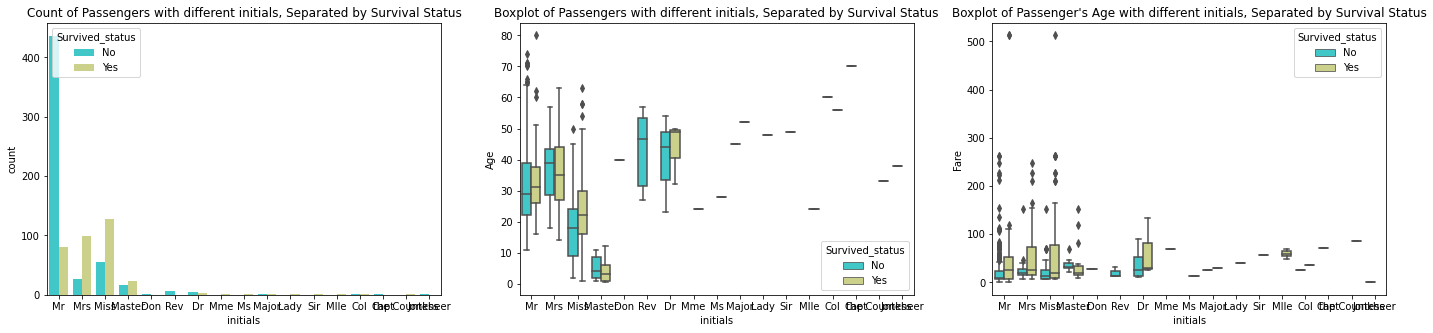

In [17]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(24,5))
sns.countplot(x='initials',data=df, palette='rainbow',hue='Survived_status',ax=axes[0]).set(title="Count of Passengers with different initials, Separated by Survival Status")
sns.boxplot(x='initials',y='Age',data=df, palette='rainbow',hue='Survived_status',ax=axes[1]).set(title="Boxplot of Passengers with different initials, Separated by Survival Status")
sns.boxplot(x='initials',y='Fare',data=df, palette='rainbow',hue='Survived_status',ax=axes[2]).set(title="Boxplot of Passenger's Age with different initials, Separated by Survival Status")
plt.show()

**Conclusion**

*  As observed before, most of Male Passengers didnot survive as compared to Female counterpart
*  Out of the Male Passengers, most victims were from those with initials - 'Mr.' 

In [19]:
df.loc[df['Fare']==0.0,:].groupby('Pclass').describe().iloc[:,0]

Pclass
1    5.0
2    6.0
3    4.0
Name: (PassengerId, count), dtype: float64

1.  Between Survivor and P-class

In [20]:
survivor_pclass = pd.DataFrame(df['Survived_status'].unique(),columns=['Survived'])
survivor_pclass[['Pclass=1','Pclass=2','Pclass=3']] = None
survivor_pclass.loc[survivor_pclass['Survived']=='No','Pclass=1']=df.loc[(df['Survived_status']=='No') & (df['Pclass']==1),].shape[0]
survivor_pclass.loc[survivor_pclass['Survived']=='No','Pclass=2']=df.loc[(df['Survived_status']=='No') & (df['Pclass']==2),].shape[0]
survivor_pclass.loc[survivor_pclass['Survived']=='No','Pclass=3']=df.loc[(df['Survived_status']=='No') & (df['Pclass']==3),].shape[0]
survivor_pclass.loc[survivor_pclass['Survived']=='Yes','Pclass=1']=df.loc[(df['Survived_status']=='Yes') & (df['Pclass']==1),].shape[0]
survivor_pclass.loc[survivor_pclass['Survived']=='Yes','Pclass=2']=df.loc[(df['Survived_status']=='Yes') & (df['Pclass']==2),].shape[0]
survivor_pclass.loc[survivor_pclass['Survived']=='Yes','Pclass=3']=df.loc[(df['Survived_status']=='Yes') & (df['Pclass']==3),].shape[0]
survivor_pclass

,Survived,Pclass=1,Pclass=2,Pclass=3
0,No,80,97,372
1,Yes,136,87,119


2.  Between Survivor and Sex

In [21]:
survivor_gender = pd.DataFrame(df['Survived_status'].unique(),columns=['Survived'])
survivor_gender[['female','male']] = None
survivor_gender.loc[survivor_gender['Survived']=='No','female']=df.loc[(df['Survived_status']=='No') & (df['Sex']=='female'),].shape[0]
survivor_gender.loc[survivor_gender['Survived']=='No','male']=df.loc[(df['Survived_status']=='No') & (df['Sex']=='male'),].shape[0]
survivor_gender.loc[survivor_gender['Survived']=='Yes','female']=df.loc[(df['Survived_status']=='Yes') & (df['Sex']=='female'),].shape[0]
survivor_gender.loc[survivor_gender['Survived']=='Yes','male']=df.loc[(df['Survived_status']=='Yes') & (df['Sex']=='male'),].shape[0]
survivor_gender

,Survived,female,male
0,No,81,468
1,Yes,233,109


3.  Between Sex and Pclass

In [22]:
sex_pclass = pd.DataFrame(df['Sex'].unique(),columns=['Sex'])
sex_pclass[['Pclass=1','Pclass=2','Pclass=3']] = None
sex_pclass.loc[sex_pclass['Sex']=='male','Pclass=1']=df.loc[(df['Sex']=='male') & (df['Pclass']==1),].shape[0]
sex_pclass.loc[sex_pclass['Sex']=='male','Pclass=2']=df.loc[(df['Sex']=='male') & (df['Pclass']==2),].shape[0]
sex_pclass.loc[sex_pclass['Sex']=='male','Pclass=3']=df.loc[(df['Sex']=='male') & (df['Pclass']==3),].shape[0]
sex_pclass.loc[sex_pclass['Sex']=='female','Pclass=1']=df.loc[(df['Sex']=='female') & (df['Pclass']==1),].shape[0]
sex_pclass.loc[sex_pclass['Sex']=='female','Pclass=2']=df.loc[(df['Sex']=='female') & (df['Pclass']==2),].shape[0]
sex_pclass.loc[sex_pclass['Sex']=='female','Pclass=3']=df.loc[(df['Sex']=='female') & (df['Pclass']==3),].shape[0]
sex_pclass

,Sex,Pclass=1,Pclass=2,Pclass=3
0,male,122,108,347
1,female,94,76,144


In [23]:
from scipy.stats import chi2_contingency
def contigency_independence(df):
  return chi2_contingency(np.matrix(df))

print(contigency_independence(survivor_gender[survivor_gender.columns[1:]]))
print(contigency_independence(survivor_pclass[survivor_pclass.columns[1:]]))
print(contigency_independence(sex_pclass[sex_pclass.columns[1:]]))

(260.71702016732104, 1.1973570627755645e-58, 1, array([[193.47474747, 355.52525253],

       [120.52525253, 221.47474747]]))

(102.88898875696056, 4.549251711298793e-23, 2, array([[133.09090909, 113.37373737, 302.53535354],

       [ 82.90909091,  70.62626263, 188.46464646]]))

(16.97149909551711, 0.0002063886434823315, 2, array([[139.87878788, 119.15600449, 317.96520763],

       [ 76.12121212,  64.84399551, 173.03479237]]))


Next, analyse is there any relationship between survivors and P-class for male and female

So, for Sex='male', we check independence between Survivor & P-class

In [24]:
df_male = df.loc[df['Sex']=='male',:]
male_survivor_pclass = pd.DataFrame(df_male['Survived_status'].unique(),columns=['Survived'])
male_survivor_pclass[['Pclass=1','Pclass=2','Pclass=3']] = None
male_survivor_pclass.loc[male_survivor_pclass['Survived']=='No','Pclass=1']= df_male.loc[(df_male['Survived_status']=='No') &  (df_male['Pclass']==1),].shape[0]
male_survivor_pclass.loc[male_survivor_pclass['Survived']=='No','Pclass=2']= df_male.loc[(df_male['Survived_status']=='No') &  (df_male['Pclass']==2),].shape[0]
male_survivor_pclass.loc[male_survivor_pclass['Survived']=='No','Pclass=3']= df_male.loc[(df_male['Survived_status']=='No') &  (df_male['Pclass']==3),].shape[0]
male_survivor_pclass.loc[male_survivor_pclass['Survived']=='Yes','Pclass=1']=df_male.loc[(df_male['Survived_status']=='Yes') & (df_male['Pclass']==1),].shape[0]
male_survivor_pclass.loc[male_survivor_pclass['Survived']=='Yes','Pclass=2']=df_male.loc[(df_male['Survived_status']=='Yes') & (df_male['Pclass']==2),].shape[0]
male_survivor_pclass.loc[male_survivor_pclass['Survived']=='Yes','Pclass=3']=df_male.loc[(df_male['Survived_status']=='Yes') & (df_male['Pclass']==3),].shape[0]
male_survivor_pclass

,Survived,Pclass=1,Pclass=2,Pclass=3
0,No,77,91,300
1,Yes,45,17,47


In [25]:
female_survivor_pclass = pd.DataFrame(df_male['Survived_status'].unique(),columns=['Survived'])
female_survivor_pclass[['Pclass=1','Pclass=2','Pclass=3']] = None
female_survivor_pclass.loc[female_survivor_pclass['Survived']=='No','Pclass=1']= df_male.loc[(df_male['Survived_status']=='No') &  (df_male['Pclass']==1),].shape[0]
female_survivor_pclass.loc[female_survivor_pclass['Survived']=='No','Pclass=2']= df_male.loc[(df_male['Survived_status']=='No') &  (df_male['Pclass']==2),].shape[0]
female_survivor_pclass.loc[female_survivor_pclass['Survived']=='No','Pclass=3']= df_male.loc[(df_male['Survived_status']=='No') &  (df_male['Pclass']==3),].shape[0]
female_survivor_pclass.loc[female_survivor_pclass['Survived']=='Yes','Pclass=1']=df_male.loc[(df_male['Survived_status']=='Yes') & (df_male['Pclass']==1),].shape[0]
female_survivor_pclass.loc[female_survivor_pclass['Survived']=='Yes','Pclass=2']=df_male.loc[(df_male['Survived_status']=='Yes') & (df_male['Pclass']==2),].shape[0]
female_survivor_pclass.loc[female_survivor_pclass['Survived']=='Yes','Pclass=3']=df_male.loc[(df_male['Survived_status']=='Yes') & (df_male['Pclass']==3),].shape[0]
female_survivor_pclass

,Survived,Pclass=1,Pclass=2,Pclass=3
0,No,77,91,300
1,Yes,45,17,47


In [26]:
print(contigency_independence(female_survivor_pclass[female_survivor_pclass.columns[1:]]))
print(contigency_independence(male_survivor_pclass[male_survivor_pclass.columns[1:]]))

(32.954129468508505, 6.983959431184943e-08, 2, array([[ 98.95320624,  87.59792028, 281.44887348],

       [ 23.04679376,  20.40207972,  65.55112652]]))

(32.954129468508505, 6.983959431184943e-08, 2, array([[ 98.95320624,  87.59792028, 281.44887348],

       [ 23.04679376,  20.40207972,  65.55112652]]))


**Conclusion**

We observe form the above Contigency Table analysis- features: **(Survivor & Gender)**, **(Survivor & Passenger-class)** and **(Gender & Passenger-class)**  are not independent

In [27]:
print("--------Percentage of data missing from Variables: --------")
(df.isna().sum()/len(df)*100).apply(lambda x: str(((x*100)//1)/100)+"%")

--------Percentage of data missing from Variables: --------


PassengerId          0.0%
Survived             0.0%
Pclass               0.0%
Name                 0.0%
Sex                  0.0%
Age                19.86%
SibSp                0.0%
Parch                0.0%
Ticket               0.0%
Fare                 0.0%
Cabin               77.1%
Embarked            0.22%
Survived_status      0.0%
initials             0.0%
dtype: object

**Conclusion**

*  For **'Cabin'** - this is nominal data type. We observe no noticable trend in Cabins
*  **Cabin** has almost 77% of data missing, so we can remove it from further analysis  
*  **'Age'** is a continous data type & has around 20% missing data, while **'Embarked'** (nominal data type) has 0.2% of missing data

**Missing value imputation for 'Age'**

We can regress 'Fare' on missing data-'Age' if we observe string correlation between Fare & Age. Correlation between Fare and Age is insignificant. 

Next, we analyse whether for a level of categorical variable, is there any strong correlation between Age and Fare

In [28]:
pclass_age = pd.DataFrame(df.groupby('Pclass').describe()['Age'].reset_index())
pclass_age['% missing data'] = pclass_age['Pclass'].apply(lambda x: str(((100*df[df['Pclass']==x].isna().sum()['Age']/df['Age'].isna().sum())*100//1)/100)+"%")
pclass_age['Correlation with Fare'] = pclass_age['Pclass'].apply(lambda x: df[df['Pclass']==x][['Age','Fare']].corr().iloc[0,1] )
pclass_age

,Pclass,count,mean,std,min,25%,50%,75%,max,% missing data,Correlation with Fare
0,1,186.0,38.233441,14.802856,0.92,27.0,37.0,49.0,80.0,16.94%,-0.218611
1,2,173.0,29.877630,14.001077,0.67,23.0,29.0,36.0,70.0,6.21%,-0.197038
2,3,355.0,25.140620,12.495398,0.42,18.0,24.0,32.0,74.0,76.83%,-0.260315


In [29]:
survivor_age = pd.DataFrame(df.groupby('Survived_status').describe()['Age'].reset_index())
survivor_age['% missing data'] = survivor_age['Survived_status'].apply(lambda x: str(((100*100*df[df['Survived_status']==x].isna().sum()['Age']/df['Age'].isna().sum())//1)/100)+"%")
survivor_age['Correlation with Fare'] = survivor_age['Survived_status'].apply(lambda x: df[df['Survived_status']==x][['Age','Fare']].corr().iloc[0,1] )
survivor_age

,Survived_status,count,mean,std,min,25%,50%,75%,max,% missing data,Correlation with Fare
0,No,424.0,30.626179,14.172110,1.00,21.0,28.0,39.0,74.0,70.62%,0.076852
1,Yes,290.0,28.343690,14.950952,0.42,19.0,28.0,36.0,80.0,29.37%,0.162648


In [30]:
embark_age = pd.DataFrame(df.groupby('Embarked').describe()['Age'].reset_index())
embark_age['% missing data'] = embark_age['Embarked'].apply(lambda x: str(((100*df[df['Embarked']==x].isna().sum()['Age']/df['Age'].isna().sum())*100//1)/100)+"%")
embark_age['Correlation with Fare'] = embark_age['Embarked'].apply(lambda x: df[df['Embarked']==x][['Age','Fare']].corr().iloc[0,1] )
embark_age

,Embarked,count,mean,std,min,25%,50%,75%,max,% missing data,Correlation with Fare
0,C,130.0,30.814769,15.434860,0.42,21.25,29.0,40.0,71.0,21.46%,0.160451
1,Q,28.0,28.089286,16.915396,2.00,17.50,27.0,34.5,70.5,27.68%,0.027276
2,S,554.0,29.445397,14.143192,0.67,21.00,28.0,38.0,80.0,50.84%,0.052419


In [31]:
survivor_age = pd.DataFrame(df.groupby('Sex').describe()['Age'].reset_index())
survivor_age['% missing data'] = survivor_age['Sex'].apply(lambda x: str(((100*100*df[df['Sex']==x].isna().sum()['Age']/df['Age'].isna().sum())//1)/100)+"%")
survivor_age['Correlation with Fare'] = survivor_age['Sex'].apply(lambda x: df[df['Sex']==x][['Age','Fare']].corr().iloc[0,1] )
survivor_age

,Sex,count,mean,std,min,25%,50%,75%,max,% missing data,Correlation with Fare
0,female,261.0,27.915709,14.110146,0.75,18.0,27.0,37.0,63.0,29.94%,0.171468
1,male,453.0,30.726645,14.678201,0.42,21.0,29.0,39.0,80.0,70.05%,0.077331


**Conclusion**

We observe no significant relation between Age and Fare for any level of categorical features. 

Best way to impute is create combination-sequence of these categorical variables, then use the mean/median for each sequence to impute the missing ones.

P-class has 3 levels, Sex has 2 levels & Survivor has 2 levels.
So we will have total 12 sequences 

In [32]:
import itertools
listOLists = [df['Pclass'].unique(), df['Sex'].unique(), df['Survived_status'].unique()]
sequence = pd.DataFrame(columns=['Pclass','Sex','Survived_status','mean_Age','median_age','% of Age missing'])
for l in itertools.product(*listOLists):
    a=df[(df['Pclass']==l[0]) & (df['Sex']==l[1]) & (df['Survived_status']==l[2])]['Age'].mean()
    b=df[(df['Pclass']==l[0]) & (df['Sex']==l[1]) & (df['Survived_status']==l[2])]['Age'].median()
    c=str((100*df[(df['Pclass']==l[0]) & (df['Sex']==l[1]) & (df['Survived_status']==l[2])]['Age'].isna().sum()/df['Age'].isna().sum())*100//1/100)+"%"
    sequence.loc[len(sequence),:] = [*list(l),a,b,c]
sequence

,Pclass,Sex,Survived_status,mean_Age,median_age,% of Age missing
0,3,male,No,27.255814,25.0,48.02%
1,3,male,Yes,22.274211,25.0,5.08%
2,3,female,No,23.818182,22.0,9.6%
3,3,female,Yes,19.329787,19.0,14.12%
4,1,male,No,44.581967,45.5,9.03%
5,1,male,Yes,36.248,36.0,2.82%
6,1,female,No,25.666667,25.0,0.0%
7,1,female,Yes,34.939024,35.0,5.08%
8,2,male,No,33.369048,30.5,3.95%
9,2,male,Yes,16.022,3.0,1.12%


Conclusion

In Most of the sequences (Pclass--Sex--Survived_status), mean is close to median. However, at '2'--'male--'Yes' mean is much different than median, indicating outliers. 

So, for each sequences (Pclass--Sex--Survived_status), we impute the missing 'Age' datas using median, in-order to keep uniformity.	

In [33]:
for l in itertools.product(*listOLists):
  df.loc[(df['Pclass']==l[0]) & (df['Sex']==l[1]) & (df['Survived_status']==l[2]) & (df['Age'].isnull()),'Age'] = df.loc[(df['Pclass']==l[0]) & (df['Sex']==l[1]) & (df['Survived_status']==l[2]), ['Age']].median()[0]

In [34]:
df.isna().sum()

PassengerId          0
Survived             0
Pclass               0
Name                 0
Sex                  0
Age                  0
SibSp                0
Parch                0
Ticket               0
Fare                 0
Cabin              687
Embarked             2
Survived_status      0
initials             0
dtype: int64

**Missing value imputation for 'Embarked'**

This categorical variable of Nominal type. This variable has ony 0.22 % missing values or just 2 missings.

Due to less number of missing values, we can simply impute by the Majority class of 'Embarked'

In [35]:
print(df['Embarked'].isna().sum())
df['Embarked'].fillna(df['Embarked'].mode()[0],inplace=True)
print(df['Embarked'].isna().sum())

2

0


In [36]:
dff = df.copy()
dff['Sex']=dff['Sex'].apply(lambda x: 1 if x=="female" else 0)
dff['pclass=1'] = (dff['Pclass']==1).astype('int')
dff['pclass=2'] = (dff['Pclass']==2).astype('int')
dff['pclass=3'] = (dff['Pclass']==3).astype('int')
dff['Embarked=S'] = (dff['Embarked']=='S').astype('int')
dff['Embarked=C'] = (dff['Embarked']=='C').astype('int')
dff['Embarked=Q'] = (dff['Embarked']=='Q').astype('int')
dff.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived_status,initials,pclass=1,pclass=2,pclass=3,Embarked=S,Embarked=C,Embarked=Q
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S,No,Mr,0,0,1,1,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,Yes,Mrs,1,0,0,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Yes,Miss,0,0,1,1,0,0


In [37]:
df['initials'].value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: initials, dtype: int64

We had observed earlier, Female had the higher chance of survival

We select first 4 initials as our 4 new features

In [38]:
dff['initials=Master'] = (dff['initials']=='Master').astype('int')
dff['initials=Mr'] = (dff['initials']=='Mr').astype('int')
dff['initials=Miss'] = (dff['initials']=='Miss').astype('int')
dff['initials=Mrs'] = (dff['initials']=='Mrs').astype('int')
print(dff.columns)
dff.head(3)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',

       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Survived_status',

       'initials', 'pclass=1', 'pclass=2', 'pclass=3', 'Embarked=S',

       'Embarked=C', 'Embarked=Q', 'initials=Master', 'initials=Mr',

       'initials=Miss', 'initials=Mrs'],

      dtype='object')


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,pclass=1,pclass=2,pclass=3,Embarked=S,Embarked=C,Embarked=Q,initials=Master,initials=Mr,initials=Miss,initials=Mrs
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,...,0,0,1,1,0,0,0,1,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,...,1,0,0,0,1,0,0,0,0,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,...,0,0,1,1,0,0,0,0,1,0


Final Feature selection and dropping irrelevent ones 

In [39]:
dff.drop(['PassengerId','Pclass','Name','Ticket','Cabin','Embarked','Survived_status','SibSp','Parch','initials'],axis=1,inplace=True)

In [40]:
dff.head(3)

,Survived,Sex,Age,Fare,pclass=1,pclass=2,pclass=3,Embarked=S,Embarked=C,Embarked=Q,initials=Master,initials=Mr,initials=Miss,initials=Mrs
0,0,0,22.0,7.2500,0,0,1,1,0,0,0,1,0,0
1,1,1,38.0,71.2833,1,0,0,0,1,0,0,0,0,1
2,1,1,26.0,7.9250,0,0,1,1,0,0,0,0,1,0


In [41]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
x=dff[[col for col in list(dff.columns) if col!='Survived']]
x = sc_x.fit_transform(x) 
y=dff['Survived']

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
x_train, x_cv, y_train, y_cv = train_test_split(
    x,
    y,
    test_size=0.25,
    random_state=0
)

In [43]:
model = LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [44]:
y_pred = model.predict(x_cv)
y_pred

array([0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 1])

In [45]:
print("Accuracy of Logistic Model: ",sum([y_pred==y_cv][0].values)/len(y_cv))

Accuracy of Logistic Model:  0.7982062780269058


Overall accuracy

In [46]:
print("Overall Accuracy of Logistic Model on CV dataset: ",sum([y_pred==y_cv][0].values)/len(y_cv))
print("Overall Accuracy of Logistic Model on Train dataset: ",sum([model.predict(x_train)==y_train][0].values)/len(y_train))

Overall Accuracy of Logistic Model on CV dataset:  0.7982062780269058

Overall Accuracy of Logistic Model on Train dataset:  0.8188622754491018


In [47]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_cv, y_pred)

true_pos_rate = len(y_pred[(y_cv==y_pred) & (y_pred==1)])/sum(y_cv==1)
true_neg_rate = len(y_pred[(y_cv==y_pred) & (y_pred==0)])/sum(y_cv==0)
false_pos_rate = len(y_pred[(y_cv!=y_pred) & (y_pred==1)])/(len(y_pred[(y_cv!=y_pred) & (y_pred==1)]) + len(y_pred[(y_cv==y_pred) & (y_pred==0)]))
false_neg_rate = len(y_pred[(y_cv!=y_pred) & (y_pred==0)])/(len(y_pred[(y_cv!=y_pred) & (y_pred==0)]) + len(y_pred[(y_cv==y_pred) & (y_pred==1)]))

In [48]:
confusion_matrix(y_cv, y_pred)

array([[115,  24],
       [ 21,  63]])

In [49]:
print(false_neg_rate, false_pos_rate, true_neg_rate, true_pos_rate)

0.25 0.17266187050359713 0.8273381294964028 0.75





*   FPR = 0.172: i.e.,  nearly 17 % of the Victims were wrongly predicted as Survivor
*   FNR = 0.250: i.e.,  nearly 25 % of the Survivor were wrongly predicted as Victims
*   TNR = 0.827: i.e.,  nearly 83 % of the Victims were correctly predicted as Victims
*   TPR = 0.750: i.e.,  nearly 75 % of the Survivors were correctly predicted as Survivors




**Recall** & **Precision** & **F1-Score**


In [50]:
from sklearn.metrics import precision_score,recall_score,f1_score

print("Recall: TP/(TP+FN) is := ",len(y_pred[(y_cv==y_pred) & (y_pred==1)])/( len(y_pred[(y_cv==y_pred) & (y_pred==1)]) + len(y_pred[(y_cv!=y_pred) & (y_pred==0)])))
print("Precision: TP/(TP+FP) is := ", len(y_pred[(y_cv==y_pred) & (y_pred==1)]) / ( len(y_pred[(y_cv==y_pred) & (y_pred==1)]) + len(y_pred[(y_cv!=y_pred) & (y_pred==1)]) ))
print("F1 Score: 2/(1/recall + 1/precision) is := ", 2/((1/recall_score(y_cv, y_pred)) + (1/precision_score(y_cv, y_pred))) )

Recall: TP/(TP+FN) is :=  0.75

Precision: TP/(TP+FP) is :=  0.7241379310344828

F1 Score: 2/(1/recall + 1/precision) is :=  0.7368421052631579


1.   Recall = 0.75, i.e., 75 % of actual positives were correctly predicted as positive
2.   Precision = 0.72, i.e.,  73% of total positives predicted were actually positive
3.   F1 score = 0.76



In [52]:
from sklearn.metrics import roc_auc_score
print("AUC Score := ", roc_auc_score(y_cv, y_pred))

AUC Score :=  0.7886690647482014


In [53]:
x=dff[[col for col in list(dff.columns) if col!='Survived']]
x = sc_x.fit_transform(x) 
y=dff['Survived']

train_x,test_x,train_y,test_y=[None]*4
num_shuffles=300
shuffled = pd.DataFrame(columns=['Shuffle No','train_accuracy','cv_accuracy','train_recall','cv_recall','train_precision','cv_precision','train_f1score','cv_f1score','train_auc','cv_auc'])
for i in range(num_shuffles):
  train_x,test_x,train_y,test_y = train_test_split(x,y,random_state=None,test_size=0.3,shuffle=True)
  model.fit(train_x,train_y)
  
  y_pred = model.predict(train_x)
  accuracy_train = sum([y_pred==train_y][0].values)/len(train_y)
  
  tr_precision = precision_score(train_y, y_pred)
  tr_recall = recall_score(train_y, y_pred)
  tr_f1score = f1_score(train_y, y_pred)
  tr_auc = roc_auc_score(train_y, y_pred)

  y_pred = model.predict(test_x)
  accuracy_cv = sum([y_pred==test_y][0].values)/len(test_y)

  cv_precision = precision_score(test_y, y_pred)
  cv_recall = recall_score(test_y, y_pred)
  cv_f1score = f1_score(test_y, y_pred)
  cv_auc = roc_auc_score(test_y, y_pred)

  shuffled.loc[len(shuffled.index)]=[int(i+1), accuracy_train, accuracy_cv, tr_recall, cv_recall, tr_precision, cv_precision, tr_f1score, cv_f1score, tr_auc, cv_auc]
shuffled.head(5)

,Shuffle No,train_accuracy,cv_accuracy,train_recall,cv_recall,train_precision,cv_precision,train_f1score,cv_f1score,train_auc,cv_auc
0,1.0,0.817014,0.820896,0.717391,0.714286,0.771028,0.833333,0.743243,0.769231,0.796355,0.805861
1,2.0,0.813804,0.783582,0.731092,0.759615,0.769912,0.705357,0.750000,0.731481,0.798014,0.779198
2,3.0,0.815409,0.813433,0.717300,0.742857,0.779817,0.772277,0.747253,0.757282,0.796474,0.800876
3,4.0,0.807384,0.813433,0.711864,0.707547,0.763636,0.797872,0.736842,0.750000,0.788749,0.795132
4,5.0,0.812199,0.835821,0.700855,0.750000,0.777251,0.826531,0.737079,0.786408,0.790016,0.821875


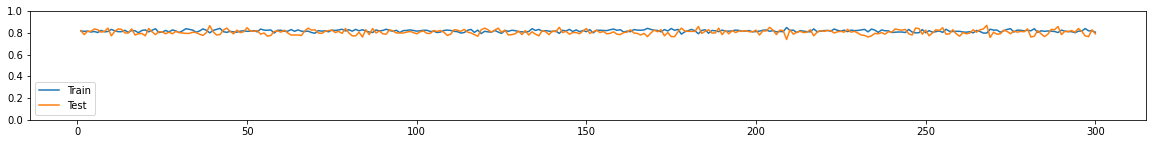

In [54]:
fig = plt.figure(figsize =(20, 2))
plt.plot(shuffled['Shuffle No'],shuffled['train_accuracy'], label='Train')
plt.plot(shuffled['Shuffle No'],shuffled['cv_accuracy'], label='Test')
plt.legend()
plt.ylim((0,1))
plt.show()

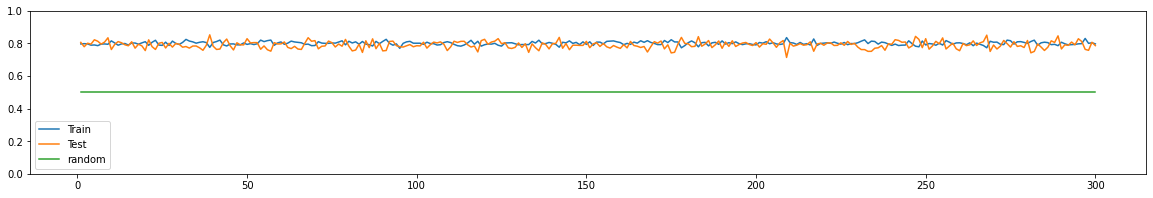

In [55]:
fig = plt.figure(figsize =(20, 3))
plt.plot(shuffled['Shuffle No'],shuffled['train_auc'], label='Train')
plt.plot(shuffled['Shuffle No'],shuffled['cv_auc'], label='Test')
plt.plot(shuffled['Shuffle No'],[0.5]*len(shuffled['Shuffle No']),label="random")
plt.legend()
plt.ylim((0,1))
plt.show()

In [56]:
from sklearn.linear_model import LogisticRegression
import scipy.stats

def do_lreg(df):
    sample = df.sample(df.shape[0], replace=True)
    X_tr = sample[[c for c in sample.columns if c != 'y']]
    y_tr = sample.y
    lr = LogisticRegression(penalty='l2', solver='liblinear')
    lr.fit(X_tr, y_tr)
    params = [lr.intercept_[0]] +  list(lr.coef_[0])
    return params

def get_se(X, y):
    lr = LogisticRegression(penalty='l2', solver='liblinear')
    lr.fit(X, y)
    df = pd.DataFrame(X)
    df['y'] = y
    r_df = pd.DataFrame([do_lreg(df) for _ in range(100)])
    w = [lr.intercept_[0]] + list(lr.coef_[0])
    se = r_df.std()
    dof = X.shape[0] - X.shape[1] - 1
    summary = pd.DataFrame({
        'coeff': w,
        'se': se,
        'z': w / se,
        '.025': w - se,
        '.975': w + se,
        'df': [dof for _ in range(len(w))]
    })
    summary['P>|z|'] = scipy.stats.t.sf(abs(summary.z), df=summary.df)
    return summary

x = np.array(dff[[col for col in list(dff.columns) if col!='Survived']])
y = np.array(dff['Survived'].values)
logistic_coeff_summary = get_se(x, y)
logistic_coeff_summary['features'] = ['intercept']+list(dff.columns)[1:]
logistic_coeff_summary


,coeff,se,z,.025,.975,df,P>|z|,features
0,0.171722,0.210800,0.814620,-0.039078,0.382521,877,2.077554e-01,intercept
1,1.827700,0.217045,8.420818,1.610655,2.044746,877,7.573824e-17,Sex
2,-0.031898,0.008050,-3.962427,-0.039948,-0.023848,877,4.011036e-05,Age
3,-0.000420,0.002354,-0.178562,-0.002775,0.001934,877,4.291616e-01,Fare
4,1.261647,0.214085,5.893212,1.047562,1.475732,877,2.698755e-09,pclass=1
5,0.104146,0.124856,0.834127,-0.020710,0.229001,877,2.022183e-01,pclass=2
6,-1.194071,0.157010,-7.605072,-1.351081,-1.037061,877,3.664088e-14,pclass=3
7,-0.281580,0.122977,-2.289702,-0.404556,-0.158603,877,1.113767e-02,Embarked=S
8,0.254789,0.200279,1.272171,0.054510,0.455068,877,1.018248e-01,Embarked=C
9,0.198512,0.219401,0.904793,-0.020888,0.417913,877,1.829118e-01,Embarked=Q


In [57]:
drop_feat_pval = logistic_coeff_summary[logistic_coeff_summary['P>|z|']>0.05]['features']
drop_feat_pval.values

array(['intercept', 'Fare', 'pclass=2', 'Embarked=C', 'Embarked=Q',
       'initials=Miss'], dtype=object)

**Conclusion**

Features: Fare & Embarked  have negligible significance on the Final Prediction. 

We create a final model by excluding these features

In [58]:
dff.drop(['Fare','Embarked=Q','Embarked=C','Embarked=S','pclass=2','initials=Miss'],axis=1,inplace=True)
x_new = np.array(dff[[col for col in list(dff.columns) if col!='Survived']])
y_new = np.array(dff['Survived'])
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score
x_train, x_cv, y_train, y_cv = train_test_split(
    x_new,
    y,
    test_size=0.25,
    random_state=0
)
model_new = LogisticRegression(penalty='l2', solver='liblinear')
model_new.fit(x_train,y_train)
y_pred = model_new.predict(x_cv)
print("Overall Accuracy of Logistic Model on CV dataset: ",sum([y_pred==y_cv][0])/len(y_cv))
print("Overall Accuracy of Logistic Model on Train dataset: ",sum([model_new.predict(x_train)==y_train][0])/len(y_train))
print("Recall on CV dataset: TP/(TP+FN) is := ",len(y_pred[(y_cv==y_pred) & (y_pred==1)])/( len(y_pred[(y_cv==y_pred) & (y_pred==1)]) + len(y_pred[(y_cv!=y_pred) & (y_pred==0)])))
print("Precision on CV dataset: TP/(TP+FP) is := ", len(y_pred[(y_cv==y_pred) & (y_pred==1)]) / ( len(y_pred[(y_cv==y_pred) & (y_pred==1)]) + len(y_pred[(y_cv!=y_pred) & (y_pred==1)]) ))
print("F1 Score on CV dataset: 2/(1/recall + 1/precision) is := ", 2/((1/recall_score(y_cv, y_pred)) + (1/precision_score(y_cv, y_pred))) )
print("AUC Score on CV dataset:= ", roc_auc_score(y_cv, y_pred))

Overall Accuracy of Logistic Model on CV dataset:  0.7668161434977578

Overall Accuracy of Logistic Model on Train dataset:  0.8053892215568862

Recall on CV dataset: TP/(TP+FN) is :=  0.7142857142857143

Precision on CV dataset: TP/(TP+FP) is :=  0.6818181818181818

F1 Score on CV dataset: 2/(1/recall + 1/precision) is :=  0.6976744186046512

AUC Score on CV dataset:=  0.7564234326824255


In [59]:
y = np.array(dff['Survived'])
x = np.array(dff[[col for col in list(dff.columns) if col!='Survived']])
y_pred = model_new.predict(x)
print("Overall Accuracy of Logistic Model on dataset: ",sum([y_pred==y][0])/len(y))
print("Recall on dataset: TP/(TP+FN) is := ",len(y_pred[(y==y_pred) & (y_pred==1)])/( len(y_pred[(y==y_pred) & (y_pred==1)]) + len(y_pred[(y!=y_pred) & (y_pred==0)])))
print("Precision on dataset: TP/(TP+FP) is := ", len(y_pred[(y==y_pred) & (y_pred==1)]) / ( len(y_pred[(y==y_pred) & (y_pred==1)]) + len(y_pred[(y!=y_pred) & (y_pred==1)]) ))
print("F1 Score on dataset: 2/(1/recall + 1/precision) is := ", 2/((1/recall_score(y, y_pred)) + (1/precision_score(y, y_pred))) )
print("AUC Score on dataset:= ", roc_auc_score(y, y_pred))
print("Features used in Final model: ",[col for col in list(dff.columns) if col!='Survived'])

Overall Accuracy of Logistic Model on dataset:  0.7957351290684624

Recall on dataset: TP/(TP+FN) is :=  0.7192982456140351

Precision on dataset: TP/(TP+FP) is :=  0.7409638554216867

F1 Score on dataset: 2/(1/recall + 1/precision) is :=  0.7299703264094956

AUC Score on dataset:=  0.7813248969418081

Features used in Final model:  ['Sex', 'Age', 'pclass=1', 'pclass=3', 'initials=Master', 'initials=Mr', 'initials=Mrs']


In [60]:
df_test = pd.read_csv("../input/titanic/test.csv")
df_test.head(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q


Missing Value Imputation

In [61]:
df_test.isna().sum()[df_test.isna().sum()>0]

Age       86
Fare       1
Cabin    327
dtype: int64

In [62]:
import itertools
listOLists = [df_test['Pclass'].unique(), df_test['Sex'].unique()]
sequence = pd.DataFrame(columns=['Pclass','Sex','mean_Age','median_age','% of Age missing'])
for l in itertools.product(*listOLists):
    a=df_test[(df_test['Pclass']==l[0]) & (df_test['Sex']==l[1]) ]['Age'].mean()
    b=df_test[(df_test['Pclass']==l[0]) & (df_test['Sex']==l[1]) ]['Age'].median()
    c=str((100*df_test[(df_test['Pclass']==l[0]) & (df_test['Sex']==l[1]) ]['Age'].isna().sum()/df_test['Age'].isna().sum())*100//1/100)+"%"
    sequence.loc[len(sequence),:] = [*list(l),a,b,c]
sequence

,Pclass,Sex,mean_Age,median_age,% of Age missing
0,3,male,24.525104,24.0,58.13%
1,3,female,23.0734,22.0,25.58%
2,2,male,30.940678,28.0,4.65%
3,2,female,24.376552,24.0,1.16%
4,1,male,40.52,42.0,8.13%
5,1,female,41.333333,41.0,2.32%


In [63]:
for l in itertools.product(*listOLists):
  df_test.loc[(df_test['Pclass']==l[0]) & (df_test['Sex']==l[1]) & (df_test['Age'].isnull()),'Age'] = df_test.loc[(df_test['Pclass']==l[0]) & (df_test['Sex']==l[1]) , ['Age']].median()[0]

In [64]:
df_test.isna().sum()[df_test.isna().sum()>0]

Fare       1
Cabin    327
dtype: int64

In [65]:
dff_test = df_test.copy()
dff_test['Sex']=dff_test['Sex'].apply(lambda x: 1 if x=="female" else 0)
dff_test['pclass=1'] = (dff_test['Pclass']==1).astype('int')
dff_test['pclass=3'] = (dff_test['Pclass']==3).astype('int')
dff_test['initials'] = dff_test['Name'].apply(lambda x: x.split(", ")[1].split(".")[0])
dff_test['initials=Master'] = (dff_test['initials']=='Master').astype('int')
dff_test['initials=Mr'] = (dff_test['initials']=='Mr').astype('int')
dff_test['initials=Mrs'] = (dff_test['initials']=='Mrs').astype('int')
dff_test.head(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,pclass=1,pclass=3,initials,initials=Master,initials=Mr,initials=Mrs
0,892,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,NaN,Q,0,1,Mr,0,1,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,NaN,S,0,1,Mrs,0,0,1
2,894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,NaN,Q,0,0,Mr,0,1,0


Selecting final features for prediction

In [66]:
dfff = dff_test.copy()
dfff.drop(['PassengerId','Pclass','Name','SibSp','initials','Parch','Ticket','Fare','Cabin','Embarked'],axis=1,inplace=True)

In [67]:
dfff.head(2)

,Sex,Age,pclass=1,pclass=3,initials=Master,initials=Mr,initials=Mrs
0,0,34.5,0,1,0,1,0
1,1,47.0,0,1,0,0,1


In [68]:
x_test = np.array(dfff[[col for col in list(dfff.columns) if col!='Survived']])
y_pred = model_new.predict(x_test)
dfff['Survived'] = y_pred
dff_test['Survived'] = y_pred

In [69]:
dff_test.head(2)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,pclass=1,pclass=3,initials,initials=Master,initials=Mr,initials=Mrs,Survived
0,892,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,NaN,Q,0,1,Mr,0,1,0,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,NaN,S,0,1,Mrs,0,0,1,1


In [70]:
submission = dff_test.loc[:,['PassengerId','Survived']]

In [71]:
submission.to_csv('submission.csv',index=False)